In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import decomposition
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import linalg
import statsmodels
import math

In [6]:
def load_object(file_name):
    "load the pickled object"
    with open(file_name, 'rb') as f:
        return pickle.load(f)


def view_data(data_path):
    data = load_object(data_path)
    prices = data['prices']
    names = data['features']['names']
    features = data['features']['values']
    print(prices.shape)
    print(names)
    print(features.shape)
    return prices, features, names

In [7]:
prices, features, names = view_data('C3_train.pkl')

(757, 680)
['labour cost', 'analyst projected total earnings', 'weighted average outstanding shares', 'R&D intensity index', 'relative strength index', 'total assets', 'net book value', 'analyst sentiment', 'market share', 'Aggregate Capital Cost']
(756, 680, 10)


In [8]:
n_assets = len(prices[0])

n_obs = m = len(prices[:756,])


In [9]:
#Creating a returns vector using prices. Loses one DF
df = pd.DataFrame(prices)
returns_df = df.pct_change()
returns_df.drop(0, axis = 0, inplace = True)

In [287]:
#returns_df

Text(0, 0.5, 'returns')

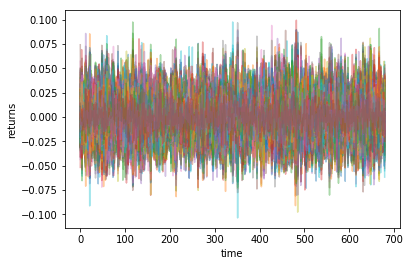

In [11]:
plt.plot(returns_df.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [288]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

# print(rand_weights(n_assets))
# print(rand_weights(n_assets))

In [13]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [289]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(returns_df) 
    for _ in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

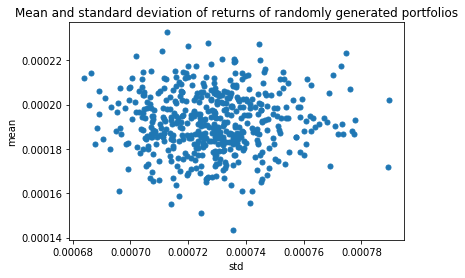

In [290]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

     pcost       dcost       gap    pres   dres
 0: -3.8610e-04 -1.0020e+00  7e+02  3e+01  3e+01
 1: -1.9651e-04 -9.9909e-01  7e+00  2e-01  2e-01
 2: -1.9496e-04 -7.2935e-01  7e-01  3e-17  1e-14
 3: -1.9572e-04 -9.2776e-03  9e-03  4e-16  2e-14
 4: -2.4715e-04 -2.0768e-03  2e-03  7e-18  4e-15
 5: -1.8696e-03 -3.5570e-03  2e-03  1e-16  2e-15
 6: -1.9473e-03 -2.0155e-03  7e-05  2e-16  1e-16
 7: -1.9908e-03 -1.9960e-03  5e-06  4e-16  5e-17
 8: -1.9941e-03 -1.9945e-03  4e-07  9e-16  4e-17
 9: -1.9942e-03 -1.9943e-03  4e-08  9e-16  4e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8609e-04 -1.0020e+00  7e+02  3e+01  3e+01
 1: -1.9651e-04 -9.9909e-01  7e+00  2e-01  2e-01
 2: -1.9496e-04 -7.2935e-01  7e-01  3e-17  1e-14
 3: -1.9572e-04 -9.2776e-03  9e-03  3e-16  2e-14
 4: -2.4715e-04 -2.0768e-03  2e-03  1e-16  4e-15
 5: -1.8687e-03 -3.5576e-03  2e-03  4e-16  2e-15
 6: -1.9463e-03 -2.0150e-03  7e-05  6e-17  1e-16
 7: -1.9900e-03 -1.9950e-03  5e-06  2e-16  4e-1

     pcost       dcost       gap    pres   dres
 0: -3.8598e-04 -1.0020e+00  7e+02  3e+01  3e+01
 1: -1.9644e-04 -9.9909e-01  7e+00  2e-01  2e-01
 2: -1.9489e-04 -7.2935e-01  7e-01  7e-16  1e-14
 3: -1.9565e-04 -9.2773e-03  9e-03  2e-16  2e-14
 4: -2.4708e-04 -2.0765e-03  2e-03  2e-16  5e-15
 5: -1.8307e-03 -3.5766e-03  2e-03  1e-15  2e-15
 6: -1.9068e-03 -1.9937e-03  9e-05  4e-16  1e-16
 7: -1.9549e-03 -1.9601e-03  5e-06  2e-16  4e-17
 8: -1.9570e-03 -1.9571e-03  1e-07  6e-16  5e-17
 9: -1.9570e-03 -1.9570e-03  1e-09  2e-16  4e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8596e-04 -1.0020e+00  7e+02  3e+01  3e+01
 1: -1.9643e-04 -9.9909e-01  7e+00  2e-01  2e-01
 2: -1.9488e-04 -7.2935e-01  7e-01  4e-16  1e-14
 3: -1.9564e-04 -9.2773e-03  9e-03  1e-16  2e-14
 4: -2.4706e-04 -2.0765e-03  2e-03  6e-18  5e-15
 5: -1.8250e-03 -3.5794e-03  2e-03  1e-15  2e-15
 6: -1.9010e-03 -1.9902e-03  9e-05  2e-16  1e-16
 7: -1.9494e-03 -1.9548e-03  5e-06  2e-16  4e-1

 2: -1.9450e-04 -7.2935e-01  7e-01  3e-17  1e-14
 3: -1.9526e-04 -9.2762e-03  9e-03  4e-16  2e-14
 4: -2.4666e-04 -2.0748e-03  2e-03  4e-16  5e-15
 5: -1.6315e-03 -3.6625e-03  2e-03  4e-16  2e-15
 6: -1.7034e-03 -1.9501e-03  2e-04  7e-16  2e-16
 7: -1.6826e-03 -1.8202e-03  1e-04  4e-16  6e-17
 8: -1.7541e-03 -1.7854e-03  3e-05  1e-15  3e-17
 9: -1.7742e-03 -1.7767e-03  3e-06  2e-16  4e-17
10: -1.7762e-03 -1.7762e-03  3e-08  1e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8519e-04 -1.0020e+00  7e+02  3e+01  3e+01
 1: -1.9599e-04 -9.9909e-01  7e+00  2e-01  2e-01
 2: -1.9444e-04 -7.2935e-01  7e-01  6e-16  1e-14
 3: -1.9520e-04 -9.2760e-03  9e-03  8e-18  2e-14
 4: -2.4660e-04 -2.0746e-03  2e-03  2e-16  5e-15
 5: -1.6045e-03 -3.6718e-03  2e-03  9e-16  2e-15
 6: -1.6751e-03 -1.9642e-03  3e-04  4e-16  2e-16
 7: -1.6423e-03 -1.8155e-03  2e-04  2e-16  6e-17
 8: -1.7251e-03 -1.7699e-03  4e-05  1e-16  3e-17
 9: -1.7533e-03 -1.7574e-03  4e-06  7e-16  3e-

 1: -1.9414e-04 -9.9907e-01  7e+00  2e-01  2e-01
 2: -1.9259e-04 -7.2934e-01  7e-01  2e-16  1e-14
 3: -1.9335e-04 -9.2704e-03  9e-03  2e-16  2e-14
 4: -2.4464e-04 -2.0665e-03  2e-03  1e-16  4e-15
 5: -1.0315e-03 -3.8027e-03  3e-03  1e-15  1e-15
 6: -1.1459e-03 -2.0025e-03  9e-04  2e-16  3e-16
 7: -1.2059e-03 -1.7485e-03  5e-04  1e-16  3e-17
 8: -1.3842e-03 -1.5283e-03  1e-04  2e-16  3e-17
 9: -1.4311e-03 -1.4725e-03  4e-05  4e-16  2e-17
10: -1.4667e-03 -1.4676e-03  9e-07  1e-16  3e-17
11: -1.4675e-03 -1.4675e-03  1e-08  2e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8147e-04 -1.0020e+00  7e+02  3e+01  3e+01
 1: -1.9385e-04 -9.9907e-01  7e+00  2e-01  2e-01
 2: -1.9229e-04 -7.2934e-01  7e-01  2e-16  1e-14
 3: -1.9306e-04 -9.2696e-03  9e-03  2e-16  2e-14
 4: -2.4434e-04 -2.0652e-03  2e-03  1e-16  5e-15
 5: -9.7296e-04 -3.8070e-03  3e-03  2e-16  1e-15
 6: -1.1066e-03 -1.9873e-03  9e-04  2e-16  3e-16
 7: -1.1858e-03 -1.7250e-03  5e-04  6e-16  3e-

     pcost       dcost       gap    pres   dres
 0: -3.6823e-04 -1.0019e+00  7e+02  3e+01  3e+01
 1: -1.8602e-04 -9.9901e-01  7e+00  2e-01  2e-01
 2: -1.8433e-04 -7.2948e-01  7e-01  2e-16  1e-14
 3: -1.8509e-04 -9.2474e-03  9e-03  2e-16  2e-14
 4: -2.3602e-04 -2.0306e-03  2e-03  6e-18  4e-15
 5: -3.9719e-04 -3.4132e-03  3e-03  4e-16  2e-16
 6: -8.1425e-04 -1.5437e-03  7e-04  1e-16  6e-17
 7: -9.7450e-04 -1.3036e-03  3e-04  2e-16  1e-17
 8: -1.0789e-03 -1.1703e-03  9e-05  3e-16  2e-17
 9: -1.1188e-03 -1.1333e-03  1e-05  3e-17  2e-17
10: -1.1301e-03 -1.1309e-03  8e-07  1e-16  2e-17
11: -1.1308e-03 -1.1308e-03  2e-08  2e-17  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6616e-04 -1.0019e+00  7e+02  3e+01  3e+01
 1: -1.8476e-04 -9.9901e-01  7e+00  2e-01  2e-01
 2: -1.8304e-04 -7.2951e-01  7e-01  1e-16  1e-14
 3: -1.8380e-04 -9.2439e-03  9e-03  2e-16  2e-14
 4: -2.3467e-04 -2.0250e-03  2e-03  6e-18  5e-15
 5: -3.8889e-04 -3.3067e-03  3e-03  4e-16  8e-1

10: -8.1496e-04 -8.1504e-04  8e-08  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1674e-04 -1.0017e+00  7e+02  3e+01  3e+01
 1: -1.5130e-04 -9.9878e-01  7e+00  2e-01  2e-01
 2: -1.4769e-04 -7.3145e-01  7e-01  4e-16  1e-14
 3: -1.4848e-04 -9.1574e-03  9e-03  2e-16  2e-14
 4: -1.9941e-04 -1.8744e-03  2e-03  6e-18  4e-15
 5: -4.8219e-04 -1.7976e-03  1e-03  3e-16  3e-17
 6: -6.2093e-04 -9.9699e-04  4e-04  4e-16  4e-17
 7: -7.3092e-04 -8.4152e-04  1e-04  3e-16  2e-17
 8: -7.7578e-04 -7.9561e-04  2e-05  2e-16  2e-17
 9: -7.8707e-04 -7.8811e-04  1e-06  2e-16  2e-17
10: -7.8778e-04 -7.8781e-04  3e-08  2e-16  1e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.0976e-04 -1.0017e+00  7e+02  3e+01  3e+01
 1: -1.4598e-04 -9.9875e-01  7e+00  2e-01  2e-01
 2: -1.4195e-04 -7.3183e-01  7e-01  4e-16  1e-14
 3: -1.4274e-04 -9.1439e-03  9e-03  2e-16  2e-14
 4: -1.9392e-04 -1.8504e-03  2e-03  4e-16  4e-15
 5: -4.7435e-04 -1.7079

 8: -4.4818e-04 -4.5268e-04  5e-06  1e-17  2e-17
 9: -4.5021e-04 -4.5059e-04  4e-07  1e-16  2e-17
10: -4.5040e-04 -4.5042e-04  2e-08  4e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6067e-04 -1.0014e+00  7e+02  3e+01  3e+01
 1:  1.0332e-05 -9.9846e-01  7e+00  2e-01  2e-01
 2:  3.8716e-05 -7.4121e-01  7e-01  1e-16  9e-15
 3:  3.7242e-05 -9.3874e-03  9e-03  2e-16  2e-14
 4: -3.7821e-05 -1.7430e-03  2e-03  2e-16  4e-15
 5: -2.6427e-04 -8.2595e-04  6e-04  2e-16  4e-17
 6: -3.6584e-04 -5.3313e-04  2e-04  2e-16  2e-17
 7: -4.1261e-04 -4.4458e-04  3e-05  2e-16  2e-17
 8: -4.2479e-04 -4.2821e-04  3e-06  4e-16  2e-17
 9: -4.2636e-04 -4.2662e-04  3e-07  1e-17  2e-17
10: -4.2648e-04 -4.2649e-04  1e-08  4e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4421e-04 -1.0014e+00  7e+02  3e+01  3e+01
 1:  3.2377e-05 -9.9846e-01  7e+00  2e-01  2e-01
 2:  6.6670e-05 -7.4208e-01  7e-01  9e-16  9e-15
 3:  6.5008e-05 -9.4948

 9: -1.0678e-04 -1.0822e-04  1e-06  1e-17  4e-17
10: -1.0727e-04 -1.0733e-04  6e-08  3e-16  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5202e-04 -1.0016e+00  7e+02  3e+01  3e+01
 1:  5.2511e-04 -9.9840e-01  8e+00  3e-01  3e-01
 2:  9.1208e-04 -7.5571e-01  8e-01  1e-16  9e-15
 3:  8.9509e-04 -1.3131e-02  1e-02  8e-18  2e-14
 4:  5.4298e-04 -3.1952e-03  4e-03  8e-18  5e-15
 5:  1.7924e-04 -8.3285e-04  1e-03  8e-18  6e-16
 6:  9.9427e-07 -4.0516e-04  4e-04  4e-16  6e-17
 7: -5.4497e-05 -1.3480e-04  8e-05  1e-17  5e-17
 8: -7.4110e-05 -8.6171e-05  1e-05  2e-16  5e-17
 9: -7.7739e-05 -7.8934e-05  1e-06  1e-17  5e-17
10: -7.8154e-05 -7.8210e-05  6e-08  1e-17  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8298e-04 -1.0016e+00  7e+02  3e+01  3e+01
 1:  5.8218e-04 -9.9837e-01  8e+00  3e-01  3e-01
 2:  1.0394e-03 -7.5665e-01  8e-01  2e-16  8e-15
 3:  1.0186e-03 -1.3749e-02  1e-02  3e-16  2e-14
 4:  6.1503e-04 -3.2842

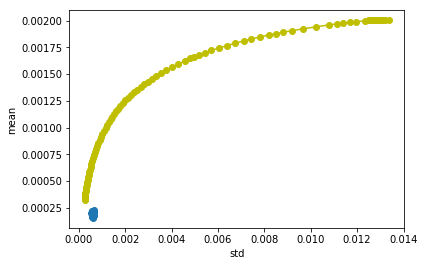

In [16]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(returns_df.T)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [29]:
np.array(returns).mean() * math.sqrt(254) / np.array(risks).mean()

3.903734334531746

In [21]:
# weights

array([[2.60126651e-09],
       [6.01082848e-10],
       [6.10062150e-10],
       [6.23328617e-10],
       [6.19052190e-10],
       [6.00039209e-10],
       [6.54391250e-10],
       [6.21909162e-10],
       [1.44545387e-09],
       [6.02036203e-10],
       [6.24224922e-10],
       [6.58711475e-10],
       [7.78726800e-10],
       [6.25394114e-10],
       [6.50429463e-10],
       [6.55045762e-10],
       [6.04207391e-10],
       [6.00352000e-10],
       [6.00152104e-10],
       [6.02217746e-10],
       [6.44405559e-10],
       [5.25851621e-09],
       [6.16068222e-10],
       [6.10179386e-10],
       [6.73305290e-10],
       [6.46041198e-10],
       [6.00319241e-10],
       [6.18710732e-10],
       [6.25975373e-10],
       [7.87047813e-10],
       [6.01160074e-10],
       [6.13477217e-10],
       [6.56053876e-10],
       [6.03722130e-10],
       [9.93620493e-10],
       [6.32841823e-10],
       [6.98277537e-10],
       [6.34263789e-10],
       [6.19624539e-10],
       [6.00828512e-10],


# Forecasting

In [85]:
#S0 to F0

s0 = returns_df.iloc[-50:-1,0] 
f0 = features[-50:-1,0]
f1squared = np.square(f0)
f0 = np.concatenate([f0,f1squared], axis = 1)


#Pull data
X_train, X_test, y_train, y_test = train_test_split(f1, s1, test_size=0.2, random_state=0) 

#Standardize
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#PCA on 6 components
pca = decomposition.PCA(n_components = 3)  
X_train = pca.fit_transform(X_train)
X_trainsquare = np.square(X_train)
X_train = np.concatenate([X_train,X_trainsquare], axis = 1)
X_test = pca.transform(X_test)
X_testsquare = np.square(X_test)
X_test = np.concatenate([X_test,X_testsquare], axis = 1)

model = LinearRegression()

explained_variance = pca.explained_variance_ratio_  
print(explained_variance)

[0.60924227 0.30442792 0.08588228]


In [86]:
reg1 = model.fit(X_train, y_train)
(reg1.coef_)
print(reg1.score(X_test, y_test))

0.7648473118313892


In [87]:
# F0 to S1

s1 = prices[-50:-1,0] 
f0 = features[-51:-2,0]
f1squared = np.square(f0)
f0 = np.concatenate([f0,f1squared], axis = 1)


#Pull data
X_train, X_test, y_train, y_test = train_test_split(f0, s1, test_size=0.2, random_state=0) 

#Standardize
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#PCA on 6 components
pca = decomposition.PCA(n_components = 3)  
X_train = pca.fit_transform(X_train)
X_trainsquare = np.square(X_train)
X_train = np.concatenate([X_train,X_trainsquare], axis = 1)
X_test = pca.transform(X_test)
X_testsquare = np.square(X_test)
X_test = np.concatenate([X_test,X_testsquare], axis = 1)

model = LinearRegression()

explained_variance = pca.explained_variance_ratio_  
print(explained_variance)

[0.67261718 0.30307911 0.0231309 ]


In [88]:
reg1 = model.fit(X_train, y_train)
print(reg1.coef_)
print(reg1.score(X_test, y_test))

[ 0.43381642  3.63240037 -7.65008287  0.48404362 -1.24466304  0.10653993]
0.6875830094182178


In [101]:
#S0 to F0

s0 = returns_df.iloc[-50:-1,0] 
f0 = features[-50:-1,0]
#f1squared = np.square(f0)
#f0 = np.concatenate([f0,f1squared], axis = 1)


#Pull data
#X_train, X_test, y_train, y_test = train_test_split(f1, s1, test_size=0.2, random_state=0) 

#Standardize
sc = StandardScaler()  
X_train = sc.fit_transform(f0)  
#X_test = sc.transform(X_test)  

#PCA on 6 components
pca = decomposition.PCA(n_components = 5)  
X_train = pca.fit_transform(X_train)
#X_trainsquare = np.square(X_train)
#X_train = np.concatenate([X_train,X_trainsquare], axis = 1)
#X_test = pca.transform(X_test)
#X_testsquare = np.square(X_test)
#X_test = np.concatenate([X_test,X_testsquare], axis = 1)

model = LinearRegression()

explained_variance = pca.explained_variance_ratio_  
print(explained_variance)

[6.82109604e-01 2.84598927e-01 3.19675687e-02 1.32389408e-03
 6.67445891e-09]


In [102]:
reg1 = model.fit(X_train, s0)
print(reg1.coef_)
print(reg1.score(X_train, s0))

[ 0.00194858  0.00037154 -0.00394735  0.10052599 -0.31331383]
0.7187711190585168


# Application

In [327]:
#Say we are given some new price/factors vector
org_prices, org_features, names = view_data('C3_train.pkl')

#Just take the first 500 features and the 501 prices, Just like train data
prices = org_prices[0:501]
features = org_features[0:500]



#Log the price vector
df = pd.DataFrame(prices)
returns_df = df.pct_change()
returns_df.drop(0, axis = 0, inplace = True)



(757, 680)
['labour cost', 'analyst projected total earnings', 'weighted average outstanding shares', 'R&D intensity index', 'relative strength index', 'total assets', 'net book value', 'analyst sentiment', 'market share', 'Aggregate Capital Cost']
(756, 680, 10)


In [225]:
#S0 to F0 for stock 0
pca = decomposition.PCA(n_components = 3)
model = LinearRegression()
sc = StandardScaler()

s0 = returns_df.iloc[-51:-2,0] 
f0 = features[:,0].copy()
df = pd.DataFrame(f0)
featureschange_df = df.pct_change()
featureschange_df.drop(0, axis = 0, inplace = True)
f0 = featureschange_df.T.iloc[:,-51:-2]



#Standardize
 
#f0 = sc.fit_transform(f0)  


#PCA on 5 components
f0 = pca.fit_transform(f0.T)


#Fit
reg1 = model.fit(f0, s0)
coef = reg1.coef_

s1 = (prices[-1][0]  - prices[-2][0]) / prices[-2][0] 
predicted_f1 = coef.T * s1


######################################################################


# F1 to S2

s1 = returns_df.iloc[-50:-1,0] 
f0 = features[:,0].copy()
df = pd.DataFrame(f0)
featureschange_df = df.pct_change()
featureschange_df.drop(0, axis = 0, inplace = True)
f0 = featureschange_df.T.iloc[:,-51:-2]

f0 = pca.fit_transform(f0.T)
#f0_sqr = np.square(f0)
#f0 = np.concatenate([f0, f0_sqr], axis = 1)


reg2 = model.fit(f0, s1)
predicted_f1
#predicted_f1squared = np.square(predicted_f1)
#predicted_f1 = np.concatenate([predicted_f1, predicted_f1squared])

x = reg2.predict(predicted_f1.reshape(1,-1))


In [246]:
#S0 to F0 for stock 1
pca = decomposition.PCA(n_components = 3)
model = LinearRegression()
sc = StandardScaler()

s0 = returns_df.iloc[-51:-2,1] 
f0 = features[:,1].copy()
df = pd.DataFrame(f0)
featureschange_df = df.pct_change()
featureschange_df.drop(0, axis = 0, inplace = True)
f0 = featureschange_df.T.iloc[:,-51:-2]



#Standardize
 
#f0 = sc.fit_transform(f0)  


#PCA on 5 components
f0 = pca.fit_transform(f0.T)


#Fit
reg1 = model.fit(f0, s0)
coef = reg1.coef_

s1 = (prices[-1][1]  - prices[-2][1]) / prices[-2][1] 
predicted_f1 = coef.T * s1


######################################################################


# F1 to S2

s1 = returns_df.iloc[-50:-1,1] 
f0 = features[:,1].copy()
df = pd.DataFrame(f0)
featureschange_df = df.pct_change()
featureschange_df.drop(0, axis = 0, inplace = True)
f0 = featureschange_df.T.iloc[:,-51:-2]

f0 = pca.fit_transform(f0.T)
#f0_sqr = np.square(f0)
#f0 = np.concatenate([f0, f0_sqr], axis = 1)


reg2 = model.fit(f0, s1)
predicted_f1
#predicted_f1squared = np.square(predicted_f1)
#predicted_f1 = np.concatenate([predicted_f1, predicted_f1squared])

x = reg2.predict(predicted_f1.reshape(1,-1))


In [252]:
#S0 to F0 for stock 2
pca = decomposition.PCA(n_components = 3)
model = LinearRegression()
sc = StandardScaler()

s0 = returns_df.iloc[-51:-2,2] 
f0 = features[:,2].copy()
df = pd.DataFrame(f0)
featureschange_df = df.pct_change()
featureschange_df.drop(0, axis = 0, inplace = True)
f0 = featureschange_df.T.iloc[:,-51:-2]



#Standardize
 
#f0 = sc.fit_transform(f0)  


#PCA on 5 components
f0 = pca.fit_transform(f0.T)


#Fit
reg1 = model.fit(f0, s0)
coef = reg1.coef_

s1 = (prices[-1][2]  - prices[-2][2]) / prices[-2][2] 
predicted_f1 = coef.T * s1


######################################################################


# F1 to S2

s1 = returns_df.iloc[-50:-1,2] 
f0 = features[:,2].copy()
df = pd.DataFrame(f0)
featureschange_df = df.pct_change()
featureschange_df.drop(0, axis = 0, inplace = True)
f0 = featureschange_df.T.iloc[:,-51:-2]

f0 = pca.fit_transform(f0.T)
#f0_sqr = np.square(f0)
#f0 = np.concatenate([f0, f0_sqr], axis = 1)


reg2 = model.fit(f0, s1)
predicted_f1
#predicted_f1squared = np.square(predicted_f1)
#predicted_f1 = np.concatenate([predicted_f1, predicted_f1squared])

x = reg2.predict(predicted_f1.reshape(1,-1))

# Arbitrary Stock Iteration

In [332]:
prices = org_prices[0:501]
features = org_features[0:500]
q = []
for k in range(0,len(prices[-1])):    
    #S0 to F0
    pca = decomposition.PCA(n_components = 3)
    model = LinearRegression()
    sc = StandardScaler()

    s0 = returns_df.iloc[-51:-2,k] 
    f0 = features[:,k].copy()
    df = pd.DataFrame(f0)
    featureschange_df = df.pct_change()
    featureschange_df.drop(0, axis = 0, inplace = True)
    f0 = featureschange_df.T.iloc[:,-51:-2]



    #Standardize

    #f0 = sc.fit_transform(f0)  


    #PCA on 5 components
    f0 = pca.fit_transform(f0.T)


    #Fit
    reg1 = model.fit(f0, s0)
    coef = reg1.coef_

    s1 = (prices[-1][k]  - prices[-2][k]) / prices[-2][k] 
    predicted_f1 = coef.T * s1


    ######################################################################


    # F1 to S2

    s1 = returns_df.iloc[-50:-1,k] 
    f0 = features[:,k].copy()
    df = pd.DataFrame(f0)
    featureschange_df = df.pct_change()
    featureschange_df.drop(0, axis = 0, inplace = True)
    f0 = featureschange_df.T.iloc[:,-51:-2]

    f0 = pca.fit_transform(f0.T)
    #f0_sqr = np.square(f0)
    #f0 = np.concatenate([f0, f0_sqr], axis = 1)


    reg2 = model.fit(f0, s1)
    predicted_f1
    #predicted_f1squared = np.square(predicted_f1)
    #predicted_f1 = np.concatenate([predicted_f1, predicted_f1squared])

    x = reg2.predict(predicted_f1.reshape(1,-1))
    q.append(x)

In [357]:
z = q.copy()
z = np.stack(z)


In [417]:
#Predicted Prices
z

array([[ 3.30891648e-03],
       [ 1.95216144e-03],
       [ 9.56679078e-05],
       [ 2.73063548e-03],
       [-3.78526219e-03],
       [-6.36220310e-04],
       [ 1.64701874e-04],
       [-1.97408596e-03],
       [ 1.01111622e-03],
       [ 2.10435116e-03],
       [ 1.66664652e-03],
       [-2.93267572e-03],
       [ 2.58230428e-03],
       [-5.72591200e-04],
       [-6.39634240e-04],
       [-2.72974561e-03],
       [-9.39432513e-04],
       [-2.85481299e-04],
       [-6.12599276e-04],
       [ 2.29190796e-04],
       [-9.90281714e-04],
       [-1.67615533e-03],
       [ 7.67705872e-04],
       [ 1.02186438e-03],
       [-1.46429115e-03],
       [-3.03286404e-05],
       [-4.25340031e-04],
       [-8.23775330e-04],
       [-5.15597324e-04],
       [-2.53924157e-03],
       [ 1.13237915e-03],
       [-1.63740552e-03],
       [ 2.37328373e-03],
       [-2.86574005e-03],
       [ 3.34266252e-03],
       [ 4.32038810e-04],
       [-1.70982916e-05],
       [ 1.81418234e-03],
       [-1.1

In [418]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.randn(n)
    return k / sum(k)

In [419]:
def random_portfolio(returns, cov):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = returns
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = cov
    
    mu = w * p
    sigma = np.sqrt(w * C * w.T)
    if m / (np.square(stds))
    # This recursion reduces outliers to keep plots pretty
    return mu, sigma

In [483]:
#Make a bunch of random portfolios and pick the highest sharpe ratio one
#b/c this is hard

In [403]:
k = np.cov(returns_df.T)
n_portfolios = 10000
means, stds = np.column_stack([
    random_portfolio(z, k) 
    for _ in range(n_portfolios)
])

In [408]:
a = means / (np.square(stds))

In [476]:
p = z
C = k
portfolio = 0
count_change = 0
count_posmu = 0
for x in range(0,50000):
    w = np.asmatrix(rand_weights(returns_df.T.shape[0]))
    mu = w * p
    if mu > 0:
        count_posmu+=1
        sigma = np.sqrt(w * C * w.T)
        sharpe = (mu / np.square(sigma))
        if sharpe > portfolio:
            weights = w
            portfolio = sharpe
            count_change+=1

In [481]:
count_posmu

24782

In [480]:
count_change

7

In [482]:
sharpe

matrix([[3.70191672]])

In [466]:
mu

matrix([[-0.00162105]])

     pcost       dcost       gap    pres   dres
 0: -2.6026e-03 -1.0068e+00  7e+02  3e+01  3e+01
 1:  4.7743e-06 -1.0039e+00  7e+00  2e-01  2e-01
 2:  2.6222e-05 -7.3423e-01  7e-01  4e-16  1e-14
 3:  1.5871e-05 -1.4111e-02  1e-02  2e-16  2e-14
 4: -3.3683e-04 -6.9100e-03  7e-03  7e-18  1e-14
 5: -1.6079e-03 -8.1774e-03  7e-03  8e-18  9e-15
 6: -6.6670e-03 -8.6289e-03  2e-03  1e-15  5e-16
 7: -6.7924e-03 -6.8254e-03  3e-05  3e-16  2e-16
 8: -6.8070e-03 -6.8074e-03  3e-07  2e-16  2e-16
 9: -6.8072e-03 -6.8072e-03  3e-09  4e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6026e-03 -1.0068e+00  7e+02  3e+01  3e+01
 1:  4.7762e-06 -1.0039e+00  7e+00  2e-01  2e-01
 2:  2.6224e-05 -7.3423e-01  7e-01  2e-16  1e-14
 3:  1.5873e-05 -1.4111e-02  1e-02  2e-16  2e-14
 4: -3.3683e-04 -6.9100e-03  7e-03  3e-16  9e-15
 5: -1.6086e-03 -8.1785e-03  7e-03  2e-16  9e-15
 6: -6.6621e-03 -8.6189e-03  2e-03  3e-16  5e-16
 7: -6.7886e-03 -6.8217e-03  3e-05  2e-16  3e-1

 1:  4.8463e-06 -1.0039e+00  7e+00  2e-01  2e-01
 2:  2.6290e-05 -7.3423e-01  7e-01  2e-16  1e-14
 3:  1.5939e-05 -1.4111e-02  1e-02  8e-18  2e-14
 4: -3.3675e-04 -6.9095e-03  7e-03  8e-18  1e-14
 5: -1.6373e-03 -8.2199e-03  7e-03  3e-17  9e-15
 6: -6.4572e-03 -8.2454e-03  2e-03  1e-15  3e-16
 7: -6.6480e-03 -6.6836e-03  4e-05  6e-16  3e-16
 8: -6.6676e-03 -6.6680e-03  4e-07  4e-16  2e-16
 9: -6.6678e-03 -6.6678e-03  4e-09  7e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6015e-03 -1.0068e+00  7e+02  3e+01  3e+01
 1:  4.8569e-06 -1.0039e+00  7e+00  2e-01  2e-01
 2:  2.6300e-05 -7.3423e-01  7e-01  9e-16  1e-14
 3:  1.5949e-05 -1.4111e-02  1e-02  4e-16  2e-14
 4: -3.3674e-04 -6.9094e-03  7e-03  2e-16  1e-14
 5: -1.6418e-03 -8.2265e-03  7e-03  3e-17  9e-15
 6: -6.4228e-03 -8.1881e-03  2e-03  7e-16  3e-16
 7: -6.6265e-03 -6.6626e-03  4e-05  2e-16  2e-16
 8: -6.6470e-03 -6.6473e-03  4e-07  3e-16  2e-16
 9: -6.6472e-03 -6.6472e-03  4e-09  4e-16  2e-

 6: -4.9483e-03 -6.6816e-03  2e-03  2e-16  8e-16
 7: -4.9235e-03 -7.7500e-03  3e-03  2e-16  4e-16
 8: -5.8917e-03 -6.3845e-03  5e-04  2e-16  2e-16
 9: -6.1508e-03 -6.1760e-03  3e-05  3e-16  2e-16
10: -6.1611e-03 -6.1614e-03  3e-07  7e-16  2e-16
11: -6.1612e-03 -6.1612e-03  3e-09  6e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5961e-03 -1.0068e+00  7e+02  3e+01  3e+01
 1:  5.2429e-06 -1.0039e+00  7e+00  2e-01  2e-01
 2:  2.6671e-05 -7.3422e-01  7e-01  7e-16  1e-14
 3:  1.6318e-05 -1.4112e-02  1e-02  4e-16  2e-14
 4: -3.3634e-04 -6.9069e-03  7e-03  2e-16  1e-14
 5: -1.8446e-03 -8.5404e-03  7e-03  2e-16  9e-15
 6: -4.5667e-03 -6.6650e-03  2e-03  1e-16  2e-15
 7: -4.6880e-03 -8.0228e-03  3e-03  1e-16  9e-16
 8: -5.7304e-03 -6.3865e-03  7e-04  7e-16  2e-16
 9: -6.0888e-03 -6.1303e-03  4e-05  6e-17  2e-16
10: -6.1112e-03 -6.1116e-03  5e-07  2e-16  1e-16
11: -6.1114e-03 -6.1114e-03  5e-09  1e-15  1e-16
Optimal solution found.
     pcost       dcost

13: -5.3961e-03 -5.4746e-03  8e-05  2e-16  1e-16
14: -5.4691e-03 -5.4701e-03  1e-06  3e-17  1e-16
15: -5.4700e-03 -5.4700e-03  1e-08  2e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5793e-03 -1.0068e+00  7e+02  3e+01  3e+01
 1:  6.3871e-06 -1.0039e+00  7e+00  2e-01  2e-01
 2:  2.7840e-05 -7.3420e-01  7e-01  9e-16  1e-14
 3:  1.7483e-05 -1.4115e-02  1e-02  7e-18  2e-14
 4: -3.3507e-04 -6.8989e-03  7e-03  2e-16  9e-15
 5: -2.0521e-03 -9.4532e-03  7e-03  8e-18  9e-15
 6: -2.5745e-03 -6.9244e-03  4e-03  6e-16  4e-15
 7: -3.5702e-03 -8.7224e-03  5e-03  7e-16  4e-15
 8: -4.3245e-03 -6.1966e-03  2e-03  2e-16  1e-15
 9: -3.3304e-03 -8.9314e-03  6e-03  8e-16  4e-16
10: -3.9660e-03 -7.1743e-03  3e-03  7e-16  9e-17
11: -4.5822e-03 -6.1424e-03  2e-03  2e-16  8e-17
12: -5.1442e-03 -5.5738e-03  4e-04  4e-16  1e-16
13: -5.3395e-03 -5.4080e-03  7e-05  9e-16  1e-16
14: -5.3977e-03 -5.4024e-03  5e-06  3e-16  1e-16
15: -5.4020e-03 -5.4021e-03  5e-08  1e-16  1e-

10: -4.5531e-03 -4.6007e-03  5e-05  3e-17  1e-16
11: -4.5955e-03 -4.5963e-03  8e-07  4e-16  1e-16
12: -4.5962e-03 -4.5962e-03  8e-09  7e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5122e-03 -1.0067e+00  7e+02  3e+01  3e+01
 1:  9.8975e-06 -1.0038e+00  7e+00  2e-01  2e-01
 2:  3.2514e-05 -7.3425e-01  7e-01  2e-16  1e-14
 3:  2.2143e-05 -1.4128e-02  1e-02  2e-16  2e-14
 4: -3.2996e-04 -6.8655e-03  7e-03  2e-16  9e-15
 5: -9.7432e-06 -1.4659e-02  1e-02  2e-16  5e-15
 6: -2.4123e-03 -8.3380e-03  6e-03  9e-16  4e-16
 7: -3.1598e-03 -5.5524e-03  2e-03  4e-16  2e-16
 8: -3.8718e-03 -4.9612e-03  1e-03  1e-16  7e-17
 9: -4.3437e-03 -4.5942e-03  3e-04  6e-17  1e-16
10: -4.4998e-03 -4.5175e-03  2e-05  4e-16  1e-16
11: -4.5149e-03 -4.5151e-03  2e-07  4e-16  1e-16
12: -4.5151e-03 -4.5151e-03  2e-09  2e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5016e-03 -1.0067e+00  7e+02  3e+01  3e+01
 1:  1.0300e-05 -1.0037

 4: -3.0874e-04 -6.7077e-03  6e-03  2e-16  9e-15
 5: -1.6765e-03 -7.3214e-03  6e-03  2e-16  9e-17
 6: -2.3338e-03 -4.2503e-03  2e-03  4e-16  1e-16
 7: -2.9957e-03 -3.6130e-03  6e-04  2e-17  7e-17
 8: -3.2857e-03 -3.4026e-03  1e-04  3e-17  7e-17
 9: -3.3661e-03 -3.3714e-03  5e-06  2e-16  8e-17
10: -3.3703e-03 -3.3704e-03  1e-07  3e-17  8e-17
11: -3.3704e-03 -3.3704e-03  3e-09  3e-17  8e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2118e-03 -1.0062e+00  7e+02  3e+01  3e+01
 1:  8.1462e-06 -1.0032e+00  7e+00  2e-01  2e-01
 2:  5.4677e-05 -7.3705e-01  7e-01  3e-16  1e-14
 3:  4.4257e-05 -1.4221e-02  1e-02  4e-16  2e-14
 4: -3.0564e-04 -6.6823e-03  6e-03  8e-18  9e-15
 5: -1.6491e-03 -6.9808e-03  5e-03  7e-17  1e-16
 6: -2.2812e-03 -4.1092e-03  2e-03  3e-17  1e-16
 7: -2.9520e-03 -3.5029e-03  6e-04  2e-16  8e-17
 8: -3.2070e-03 -3.3018e-03  9e-05  2e-16  7e-17
 9: -3.2703e-03 -3.2813e-03  1e-05  2e-17  7e-17
10: -3.2787e-03 -3.2790e-03  3e-07  2e-16  8e-

11: -2.1532e-03 -2.1532e-03  2e-09  4e-16  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4925e-03 -1.0048e+00  7e+02  3e+01  3e+01
 1: -4.0448e-05 -1.0017e+00  7e+00  2e-01  2e-01
 2:  1.4525e-04 -7.5059e-01  8e-01  4e-16  9e-15
 3:  1.3447e-04 -1.4578e-02  1e-02  4e-16  2e-14
 4: -2.1478e-04 -5.8428e-03  6e-03  4e-16  7e-15
 5: -1.1347e-03 -3.2388e-03  2e-03  8e-18  1e-16
 6: -1.6811e-03 -2.5823e-03  9e-04  4e-16  7e-17
 7: -1.9511e-03 -2.1349e-03  2e-04  2e-16  7e-17
 8: -2.0369e-03 -2.0710e-03  3e-05  1e-16  5e-17
 9: -2.0586e-03 -2.0602e-03  2e-06  2e-16  5e-17
10: -2.0598e-03 -2.0599e-03  6e-08  2e-17  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4226e-03 -1.0047e+00  7e+02  3e+01  3e+01
 1: -4.2249e-05 -1.0015e+00  7e+00  2e-01  2e-01
 2:  1.6021e-04 -7.5190e-01  8e-01  3e-17  9e-15
 3:  1.4933e-04 -1.4622e-02  1e-02  8e-18  2e-14
 4: -2.0118e-04 -5.7118e-03  6e-03  4e-16  7e-15
 5: -1.0486e-03 -3.1506

 9: -9.1110e-04 -9.1528e-04  4e-06  1e-17  6e-17
10: -9.1314e-04 -9.1347e-04  3e-07  2e-16  6e-17
11: -9.1331e-04 -9.1333e-04  1e-08  2e-16  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2672e-04 -1.0031e+00  7e+02  3e+01  3e+01
 1:  1.8890e-04 -9.9974e-01  8e+00  3e-01  3e-01
 2:  7.3902e-04 -7.6649e-01  8e-01  2e-16  8e-15
 3:  7.1700e-04 -1.5850e-02  2e-02  2e-16  2e-14
 4:  2.3132e-04 -4.0519e-03  4e-03  7e-18  5e-15
 5: -4.4522e-04 -2.3321e-03  2e-03  1e-16  1e-16
 6: -6.7040e-04 -1.1375e-03  5e-04  2e-16  9e-17
 7: -7.8558e-04 -9.4415e-04  2e-04  2e-16  6e-17
 8: -8.3851e-04 -8.6437e-04  3e-05  1e-16  6e-17
 9: -8.4893e-04 -8.5357e-04  5e-06  1e-17  6e-17
10: -8.5118e-04 -8.5143e-04  3e-07  1e-17  6e-17
11: -8.5131e-04 -8.5132e-04  8e-09  4e-16  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.7825e-04 -1.0031e+00  7e+02  3e+01  3e+01
 1:  2.2476e-04 -9.9971e-01  8e+00  3e-01  3e-01
 2:  8.2595e-04 -7.6795

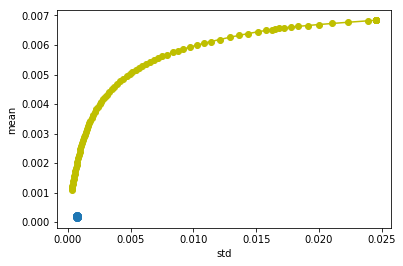

In [362]:
# def optimal_portfolio(returns, z):
#     n = len(returns)
#     returns = np.asmatrix(returns)
    
#     N = 100
#     mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
#     # Convert to cvxopt matrices
#     returns = np.asmatrix(returns_df.T)  
#     S = opt.matrix(np.cov(returns))
#     pbar = opt.matrix(np.array(z))
    
#     # Create constraint matrices
#     G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
#     h = opt.matrix(0.0, (n ,1))
#     A = opt.matrix(1.0, (1, n))
#     b = opt.matrix(1.0)
    
#     # Calculate efficient frontier weights using quadratic programming
#     portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
#                   for mu in mus]
#     ## CALCULATE RISKS AND RETURNS FOR FRONTIER
#     returns = [blas.dot(pbar, x) for x in portfolios]
#     risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
#     ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
#     m1 = np.polyfit(returns, risks, 2)
#     x1 = np.sqrt(m1[2] / m1[0])
#     # CALCULATE THE OPTIMAL PORTFOLIO
#     wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
#     return np.asarray(wt), returns, risks, portfolios

# weights, returns, risks, portfolios = optimal_portfolio(returns_df.T, z)

# plt.plot(stds, means, 'o')
# plt.ylabel('mean')
# plt.xlabel('std')
# plt.plot(risks, returns, 'y-o')

In [ ]:
# def optimal_portfolio(returns, z):
#     n = len(returns)
#     returns = np.asmatrix(returns)
    
#     N = 100
#     mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
#     # Convert to cvxopt matrices
#     returns = np.asmatrix(returns_df.T)  
#     S = opt.matrix(np.cov(returns))
#     pbar = opt.matrix(np.array(z))
    
#     # Create constraint matrices
#     G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
#     h = opt.matrix(0.0, (n ,1))
#     A = opt.matrix(1.0, (1, n))
#     b = opt.matrix(1.0)
    
#     # Calculate efficient frontier weights using quadratic programming
#     portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
#                   for mu in mus]
#     ## CALCULATE RISKS AND RETURNS FOR FRONTIER
#     returns = [blas.dot(pbar, x) for x in portfolios]
#     risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
#     ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
#     m1 = np.polyfit(returns, risks, 2)
#     x1 = np.sqrt(m1[2] / m1[0])
#     # CALCULATE THE OPTIMAL PORTFOLIO
#     wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
#     return np.asarray(wt), returns, risks, portfolios

# weights, returns, risks, portfolios = optimal_portfolio(returns_df.T, z)

# plt.plot(stds, means, 'o')
# plt.ylabel('mean')
# plt.xlabel('std')
# plt.plot(risks, returns, 'y-o')